# QF 627 Programming and Computational Finance
## Problem-Sets for Exercise `8` | `Questions`

> Hi, Team. 👋

> As discussed, throughout our semester, I’ve been doing my best to pace your learning while expanding your expertise and providing a novel framework that you could deploy in real-world practices. I kept revising all the lecture materials and exercise problem-sets so they aligned with your level of understanding.

> As you will see from the class email, I have revised the current exercise questions more than usual, as I found that the submission rate for the previous exercise problem-sets was less than ideal.

> This week’s exercise questions, as always, are intended to help you integrate what you have learned in the course, rather than test you. Please do as much as you can and feel free to submit your work, so that I can capture where you stand and pace your learning more precisely. 

> The questions below aren’t difficult as they ask incremental expansion of (with logical progression of) some of the questions you solved in previous exercise problem-sets.

> Hope you find them helpful!"🤞

    NOTE: As highlighted in class, the current exercise problem-sets have been released early to ensure our discussion leaders have ample preparation time. However, for the more extensive Question 2 on Hierarchical Clustering, I'd recommend waiting and beginning your work on it after our class next Tuesday.

### For standardization of your answers…

> Please execute the lines of code below before you start work on your answers.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

> Let's set some print option.

In [2]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

## 👇 <font color = "purple"> Bigger Question 1. ### 

### The first expanded question is where you will execute principal component analysis (PCA) for portfolio management.
    
    As noted in the lesson, the principal components of the correlation matrix capture 
    most of the covariation among assets in descending order and are mutually uncorrelated.
    
    Importantly, we can employ standardized principal components as portfolio weights.
    
    Randomly choose 40 stock tickers among the stock tickers from below DF.
    
> Set the seed number 627 for an identical set of stock tickers at the starting point of your analysis for everyone.
    
    Your objective is to find the portfolio using PCA.
    
    Select and normalize the four largest components and use them as weights for 
    portfolios that you can compare to an equal-weighted portfolio comprising all stocks.
    
    Identify the profile of the portfolio based on the portfolio weights.
    
    When comparing the performance of each portfolio over the sample period to “the market”, 
    assess the performance of other portfolios that capture different return patterns.
    
> Please use 80% of your data for PCA and 20% for backtesting.    
    
### <font color = "green"> NOTE: The investment horizon will be 11 years between 2009 and 2019.

In [3]:
list_of_tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

list_of_tickers

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### Below are the lines of code that lead to an answer:

In [4]:
import random
#data transformation
from sklearn.preprocessing import StandardScaler

yf.pdr_override()

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [5]:
#setting basline seeed
seed = 627
np.random.seed(seed)
random.seed(seed)

#randomly choose 40 stock
random_indices = random.sample(range(len(list_of_tickers)), 40)
stock_tickers = list(list_of_tickers.iloc[random_indices]["Symbol"])
stock_tickers
data_stocks = pdr.get_data_yahoo(stock_tickers,start=dt.datetime(2000,1,1))

[*********************100%%**********************]  40 of 40 completed


In [6]:
stocks = data_stocks.copy()
stocks = stocks.loc[:,("Adj Close")]
#stocks.dropna(inplace=True)
stocks

,AFL,AMGN,AVB,AVY,BBY,BG,BKR,CEG,CFG,CHRW,...,PM,PNW,RSG,SEDG,STX,STZ,SYF,VICI,WMB,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,6.998006,45.956352,13.101625,39.684231,15.775073,NaN,9.492244,NaN,NaN,6.332305,...,NaN,10.356702,6.074250,NaN,NaN,5.553933,NaN,NaN,9.618417,NaN
2000-01-04,6.812301,42.442314,12.812078,39.162991,15.672642,NaN,9.492244,NaN,NaN,6.119882,...,NaN,10.487246,5.697968,NaN,NaN,5.344876,NaN,NaN,9.405107,NaN
2000-01-05,6.773207,43.902687,12.932725,40.448742,15.570209,NaN,9.550838,NaN,NaN,6.038957,...,NaN,10.770098,5.590459,NaN,NaN,5.526058,NaN,NaN,9.986866,NaN
2000-01-06,6.910041,44.632877,13.367031,41.873474,15.433627,NaN,10.459046,NaN,NaN,6.069305,...,NaN,10.835380,5.563581,NaN,NaN,5.742081,NaN,NaN,10.200176,NaN
2000-01-07,7.046871,49.652935,13.704828,42.012482,15.911658,NaN,11.162176,NaN,NaN,6.150227,...,NaN,11.139983,5.859232,NaN,NaN,5.909327,NaN,NaN,10.471664,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,78.110001,255.699997,165.740005,174.070007,66.820000,105.980003,34.226135,112.919998,23.43,81.830002,...,89.160004,74.180000,148.490005,75.949997,68.250000,233.260223,28.049999,27.900000,34.400002,104.410004
2023-11-01,79.050003,260.839996,163.869995,173.869995,65.970001,106.059998,34.643772,114.849998,23.17,81.459999,...,89.010002,75.570000,148.740005,75.790001,71.239998,233.320007,27.969999,27.870001,34.720001,105.070000
2023-11-02,81.730003,266.589996,167.919998,176.210007,66.349998,105.470001,35.309998,117.190002,24.90,81.430000,...,90.940002,75.169998,151.710007,72.790001,71.809998,238.000000,29.080000,28.590000,35.790001,110.199997


In [7]:
#get data from 2000, drop missing values > 30%
missing_values =\
(
    stocks
    .isnull() # True (1) vs. False (0)
    .mean()
    .sort_values(ascending = False)
)

missing_values.head(13)

KVUE    0.978500
CEG     0.924500
VICI    0.754667
SEDG    0.638333
CFG     0.617333
CZR     0.617000
SYF     0.611000
PANW    0.526167
MPC     0.481167
GNRC    0.423667
PM      0.343500
MSCI    0.329833
CMG     0.254000
dtype: float64

In [8]:
drop_list =\
(
    sorted(list(missing_values[missing_values > 0.30]
                .index)
          )
)

stocks =\
(
    stocks
    .drop(labels = drop_list,
          axis = 1)
)
stocks.shape

(6000, 28)

In [9]:
stocks =\
(
    stocks
    .fillna(method = "ffill")
)

stocks =\
(
    stocks
    .dropna(axis = 0)
)

stocks.shape

(4476, 28)

In [10]:
Daily_Linear_Return =\
(
    stocks
    .pct_change(1)
)

Daily_Linear_Return.head()

,AFL,AMGN,AVB,AVY,BBY,BG,BKR,CHRW,CMG,CNC,...,LH,LMT,NSC,PG,PNW,RSG,STX,STZ,WMB,ZBH
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-27,0.000000,-0.008206,0.010172,-0.010468,-0.002195,-0.008820,0.013205,0.001238,-0.040909,0.020833,...,0.017296,-0.012092,-0.007423,0.015641,-0.002293,0.004307,-0.003054,0.000764,0.011426,0.048792
2006-01-30,-0.000210,0.014163,-0.013559,-0.003471,0.004601,-0.008042,0.039903,-0.000247,0.061611,-0.007316,...,-0.002233,0.007254,0.003436,-0.010043,-0.011163,0.004290,-0.017610,0.004576,0.009205,0.002004
2006-01-31,-0.011371,0.007882,0.005458,-0.009122,0.008762,0.017078,0.000517,0.000742,0.060714,0.019783,...,0.009466,0.014851,0.003827,0.001522,0.002116,0.010411,0.016367,0.013288,-0.011609,-0.015000
2006-02-01,0.004686,0.045274,0.002714,0.008202,-0.012436,0.013908,-0.037319,-0.017548,-0.020202,0.043743,...,-0.015516,0.004730,-0.002617,0.009961,-0.006571,-0.003963,0.000770,-0.018359,-0.003355,-0.009572


In [11]:
# Operational defition of outliers = data points beyond 3 SD

Daily_Linear_Return =\
(
    Daily_Linear_Return[Daily_Linear_Return 
                        .apply(lambda x:(x - x.mean()
                                        ).abs() < (3 * x.std()
                                                  )
                              )
                        .all(1)
    ]
)

stocks.shape[0] - Daily_Linear_Return.shape[0]

853

In [12]:
scaler =\
(
    StandardScaler()
    .fit(Daily_Linear_Return)
)

scaled_stocks =\
(
    pd
    .DataFrame(scaler.fit_transform(Daily_Linear_Return),
               columns = Daily_Linear_Return.columns,
               index = Daily_Linear_Return.index)
)

scaled_stocks.describe()

,AFL,AMGN,AVB,AVY,BBY,BG,BKR,CHRW,CMG,CNC,...,LH,LMT,NSC,PG,PNW,RSG,STX,STZ,WMB,ZBH
count,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,...,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03,3.623000e+03
mean,-1.274780e-17,-5.295240e-17,-8.825400e-18,4.608820e-17,-1.225750e-17,-8.531220e-17,5.883600e-18,-5.883600e-18,1.029630e-16,-2.941800e-18,...,2.745680e-17,-1.490512e-16,-1.127690e-17,6.864200e-17,-3.628220e-17,3.726280e-17,-7.305470e-17,-6.177780e-17,-3.579190e-17,5.295240e-17
std,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,...,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00,1.000138e+00
min,-4.719464e+00,-3.548334e+00,-4.439289e+00,-4.037702e+00,-3.948853e+00,-3.937874e+00,-3.763687e+00,-3.927277e+00,-3.950384e+00,-3.927344e+00,...,-3.953131e+00,-3.900793e+00,-3.847525e+00,-3.882468e+00,-3.837758e+00,-4.209671e+00,-3.868408e+00,-4.173113e+00,-4.285374e+00,-4.016295e+00
25%,-5.115850e-01,-5.829446e-01,-5.577855e-01,-5.692960e-01,-5.792315e-01,-5.815481e-01,-5.865208e-01,-5.656509e-01,-5.719322e-01,-5.690218e-01,...,-5.782794e-01,-5.865813e-01,-5.824406e-01,-5.626437e-01,-5.772394e-01,-5.496833e-01,-5.598404e-01,-5.811963e-01,-5.842951e-01,-5.919497e-01
50%,1.846895e-02,-1.781448e-02,3.880253e-02,1.183935e-02,1.193743e-02,-1.139134e-02,-2.324840e-03,1.625428e-02,-2.229134e-03,-1.532026e-02,...,-2.260625e-02,-3.900904e-03,1.486929e-02,8.084390e-05,1.733538e-02,1.641335e-02,1.838849e-02,-1.892308e-02,-6.858344e-03,-1.695128e-02
75%,5.045561e-01,5.977694e-01,5.799043e-01,5.725869e-01,6.284791e-01,5.439343e-01,6.218425e-01,5.629317e-01,5.645019e-01,5.709156e-01,...,5.835617e-01,5.940687e-01,5.914748e-01,5.681551e-01,6.157985e-01,5.993499e-01,5.722156e-01,5.832449e-01,5.702998e-01,5.975064e-01
max,5.108073e+00,3.786712e+00,4.223931e+00,3.924742e+00,3.967002e+00,4.102702e+00,3.697988e+00,3.974041e+00,4.125052e+00,3.871514e+00,...,3.884407e+00,3.989786e+00,3.757175e+00,3.992700e+00,3.526540e+00,4.102596e+00,3.855995e+00,3.952602e+00,4.475381e+00,3.817654e+00


In [13]:
prop =\
    int(len(scaled_stocks) * 0.80)

X_Train = scaled_stocks[    : prop] # First 80% of the data
X_Test  = scaled_stocks[prop:     ] # Remaining 20% of the data

X_Train_Raw = Daily_Linear_Return[    :prop]
X_Test_Raw  = Daily_Linear_Return[prop:    ]

stock_tickers =\
(
 scaled_stocks
 .columns
 .values
)

stock_tickers

array(['AFL', 'AMGN', 'AVB', 'AVY', 'BBY', 'BG', 'BKR', 'CHRW', 'CMG',
       'CNC', 'COST', 'CTRA', 'DHR', 'DTE', 'EMR', 'HAS', 'HBAN', 'IVZ',
       'LH', 'LMT', 'NSC', 'PG', 'PNW', 'RSG', 'STX', 'STZ', 'WMB', 'ZBH'],
      dtype=object)

In [14]:
pca = PCA()

PrincipalComponent = pca.fit(X_Train)

<Axes: title={'center': 'Cumulative Explained Variance by Each PC'}>

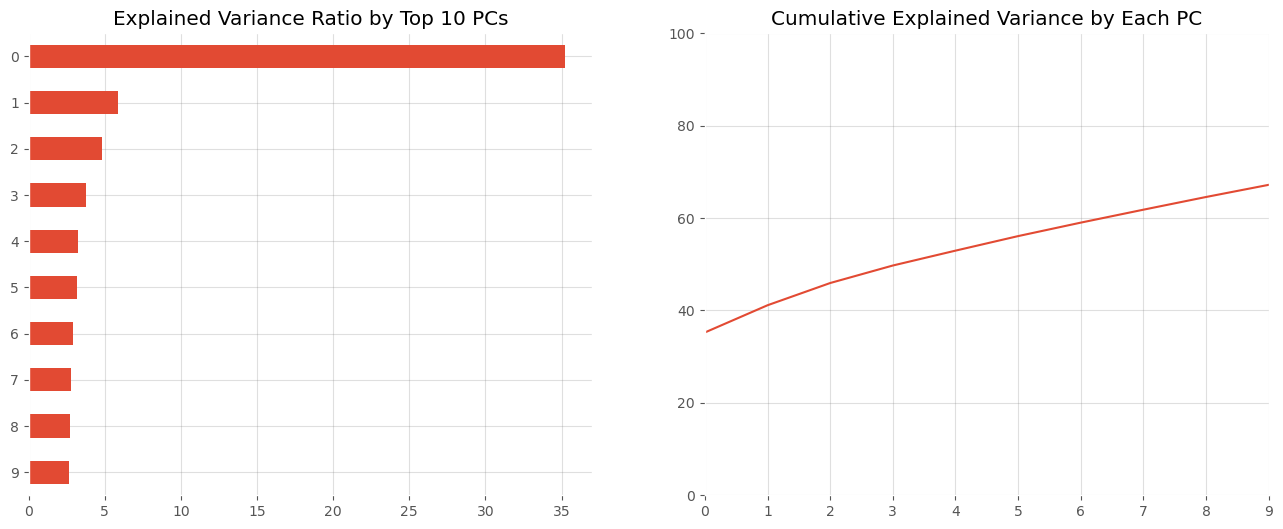

In [15]:
NumEigenValues = 10

fig, axes =\
(
    plt
    .subplots(ncols = 2,
              figsize = [16, 6]
             )
)

# Plot on the left panel

Series1 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .sort_values()
    * 100
)

# Plot on the right panel

Series2 =\
(
    pd
    .Series(pca
            .explained_variance_ratio_[ :NumEigenValues]
           )
    .cumsum()
    * 100
)

(
    Series1
    .plot
    .barh(ylim = (0, 9),
          title = "Explained Variance Ratio by Top 10 PCs",
          ax = axes[0]
         )
)

(
    Series2
    .plot(ylim = (0, 100),
          xlim = (0, 9),
          title = "Cumulative Explained Variance by Each PC",
          ax = axes[1]
         )
)

In [16]:
(
    pd
    .Series(np
           .cumsum(pca
                   .explained_variance_ratio_)
           )
    .to_frame("Explained Variance")
    .head(NumEigenValues)
    .style
    .format("{:,.2%}".format)
)

,Explained Variance
0,35.25%
1,41.14%
2,45.94%
3,49.73%
4,52.95%
5,56.10%
6,59.01%
7,61.81%
8,64.56%
9,67.19%


In [17]:
def PCWeights():

    weights = pd.DataFrame()

    for i in range(len(pca.components_)
                  ):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i]
                                                                  )

    weights = weights.values.T
    return weights # Team, be careful with indentation

In [18]:
weights = PCWeights()

In [19]:
def calculate_sharpe_ratio(ts_returns, periods_per_year = 252):

    n_years = ts_returns.shape[0] / periods_per_year

    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)
                                ) - 1

    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)

    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

In [20]:
def FindPortfolioVisual():
    
    n_portfolios = len(pca.components_)
    
    annualized_ret = np.array([0.] * n_portfolios)
    
    sharpe_metric = np.array([0.] * n_portfolios)
    
    annualized_vol = np.array([0.] * n_portfolios)
    
    highest_sharpe = 0
    
    stock_tickers = scaled_stocks.columns.values
    
    n_tickers = len(stock_tickers)
    
    PCs = pca.components_
    
    for i in range(n_portfolios):
        
        pc_w = PCs[i] / sum(PCs[i]
                           )
        
        eigen_prtfi = pd.DataFrame(data = {"weights": pc_w.squeeze()*100}, 
                                   index = stock_tickers)
        
        eigen_prtfi.sort_values(by = ["weights"],
                                ascending = False,
                                inplace = True)
        
        eigen_prti_returns = np.dot(X_Train_Raw.loc[:, eigen_prtfi.index], 
                                    pc_w)
        
        eigen_prti_returns = pd.Series(eigen_prti_returns.squeeze(),
                                       index = X_Train_Raw.index)
        
        er, vol, sharpe = calculate_sharpe_ratio(eigen_prti_returns)
        
        annualized_ret[i] = er
        
        annualized_vol[i] = vol
        
        sharpe_metric[i] = sharpe
        
        sharpe_metric = np.nan_to_num(sharpe_metric)
        
    # HOW TO FIND A PORTFOLIO with the HIGHEST Sharpe Ratio
    
    highest_sharpe = np.argmax(sharpe_metric)
    
    print("Our Eigen Portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f" %
          (highest_sharpe,
           annualized_ret[highest_sharpe]*100,
           annualized_vol[highest_sharpe]*100,
           sharpe_metric[highest_sharpe]
          )
         )
        
    #####
    
    fig, ax = plt.subplots()
    
    fig.set_size_inches(16, 6)
    
    ax.plot(sharpe_metric, 
            linewidth = 2)
    
    ax.set_title("Sharpe Ratio of Eigen-Portfolios")
    
    ax.set_ylabel("Sharpe Ratio")
    
    ax.set_xlabel("Portfolios")
    
    #####
        
    results = pd.DataFrame(data = {"Return": annualized_ret, "Vol": annualized_vol, "Sharpe": sharpe_metric}
                           )
    
    results.dropna(inplace = True)
    
    results.sort_values(by = ["Sharpe"],
                        ascending = False,
                        inplace = True)
    
    print(results.head(15)
         )
    
    plt.show()

Our Eigen Portfolio #0 with the highest Sharpe. Return 14.68%, vol = 13.33%, Sharpe = 1.10
      Return        Vol    Sharpe
0   0.146772   0.133286  1.101182
23  0.388589   1.069756  0.363250
4  -0.020965   0.429737 -0.048785
20 -1.000000  19.434388 -0.051455
8  -0.044237   0.803900 -0.055029
25 -1.000000  12.355490 -0.080936
12 -1.000000  11.497810 -0.086973
11 -1.000000   9.800530 -0.102035
17 -0.146062   1.024226 -0.142607
27 -0.999493   3.954384 -0.252756
5  -0.993087   3.154864 -0.314780
2  -0.559711   1.665489 -0.336064
15 -0.530001   1.572462 -0.337052
14 -0.466336   1.352322 -0.344841
1  -0.992727   2.689782 -0.369073


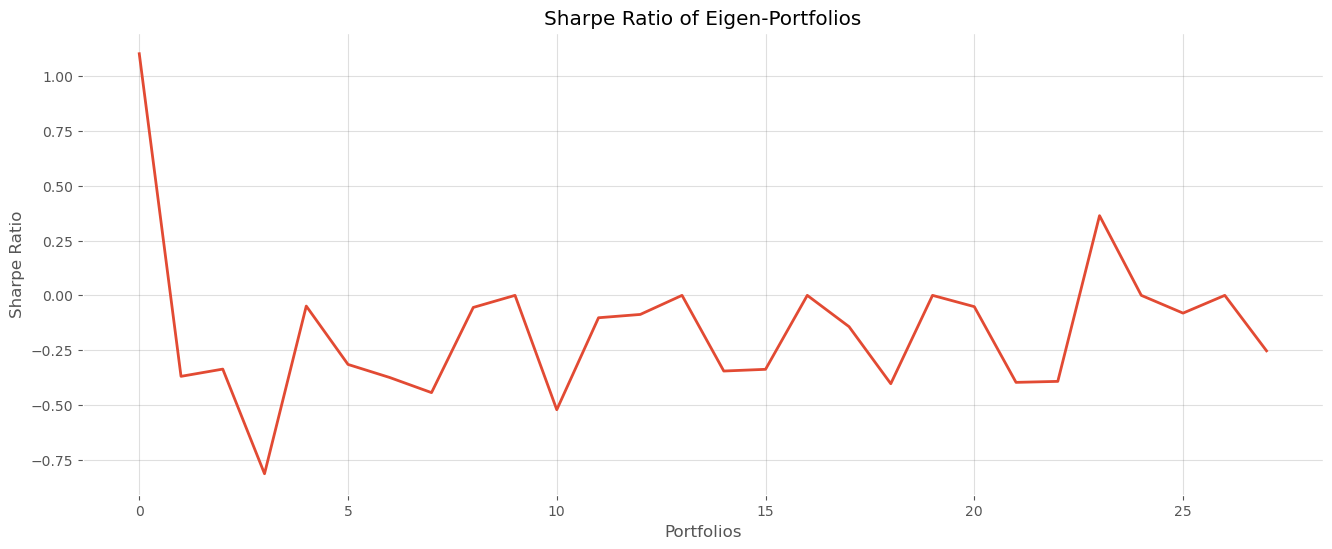

In [21]:
FindPortfolioVisual()

In [22]:
# Yet another gift

def backtest_PCA_porfolios(eigen):

    eigen_prtfi =\
        (
            pd
            .DataFrame(data = {"weights": eigen.squeeze()
                              },
                       index = stock_tickers)
        )

    eigen_prtfi.sort_values(by = ["weights"],
                            ascending = False,
                            inplace = True)

    eigen_prtfi_returns =\
    (
        np
        .dot(X_Test_Raw
             .loc[ : , eigen_prtfi.index],
             eigen)
    )

    eigen_portfolio_returns =\
    (
        pd
        .Series(eigen_prtfi_returns.squeeze(),
                index = X_Test_Raw.index)
    )

    returns, vol, sharpe = calculate_sharpe_ratio(eigen_portfolio_returns)

    print("Our PCA-based Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"  %
          (returns * 100, vol * 100, sharpe)
         )

    # Compared with what? Equal-weightage Portfolio

    equal_weight_return =\
    (
        X_Test_Raw * (1 / len(pca.components_)
                     )
    ).sum(axis = 1)

    df_plot =\
        (
            pd
            .DataFrame({"ML Portfolio Return": eigen_portfolio_returns,
                        "Equal Weight Index": equal_weight_return},
                      index = X_Test.index
                      )
        )

    (
        np
        .cumprod(df_plot + 1)
        .plot(title = "Returns of the equal weighted index vs. Eigen-Portfolio",
              figsize = [16, 8]
             )
    )

    plt.show()

Our PCA-based Portfolio:
Return = 3658133813061.71%
Volatility = 2756.40%
Sharpe = 1327143193.11


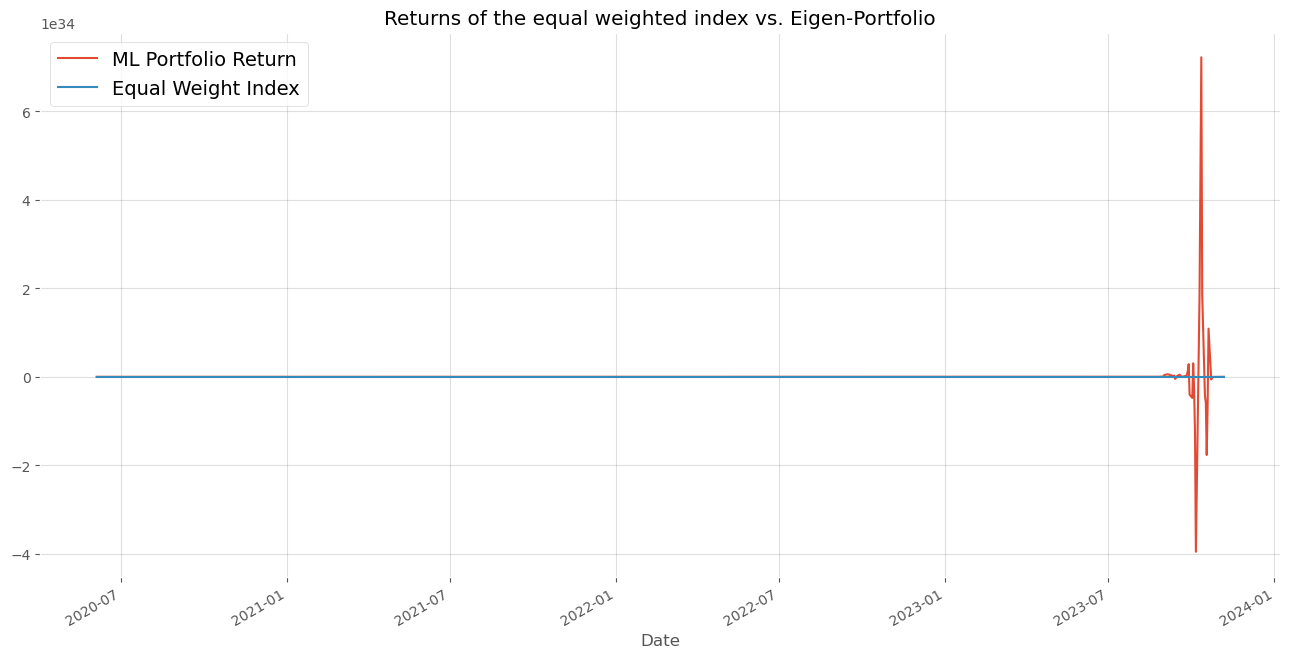

In [23]:
backtest_PCA_porfolios(eigen = weights[24]
                      )

### <font color = red> Answer 1 is presented in the cell below: </font>

Our PCA-based Portfolio:
Return = 18.17%
Volatility = 13.76%
Sharpe = 1.32


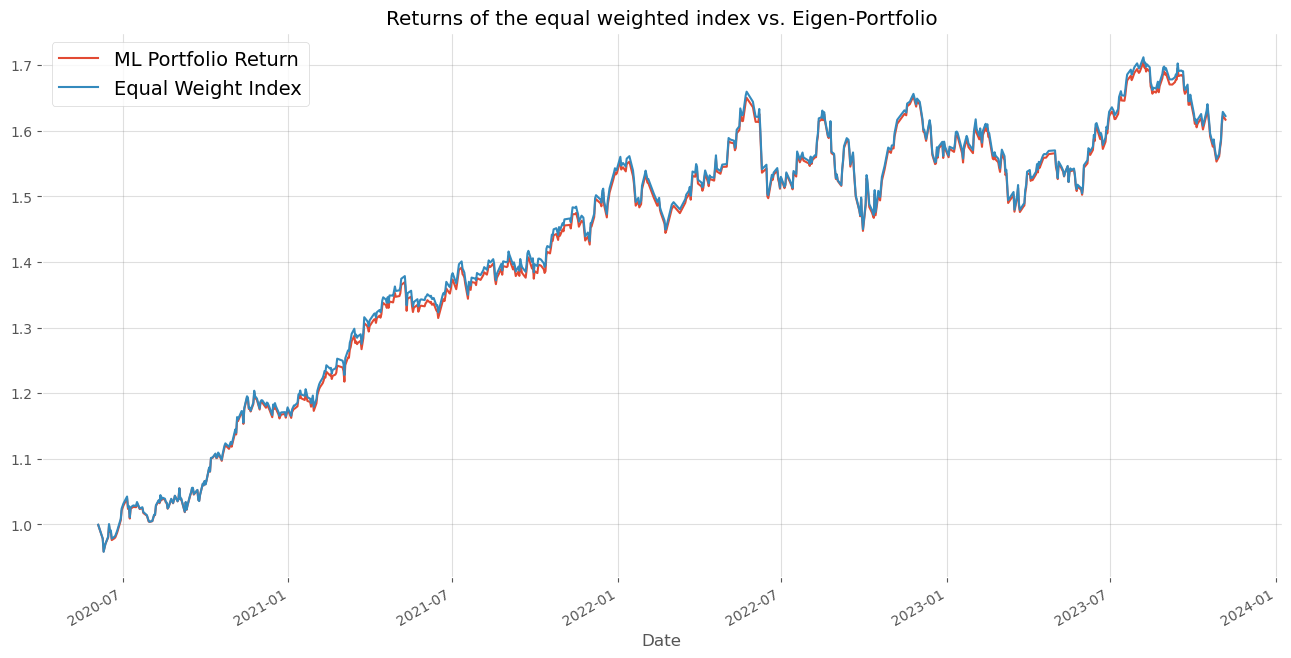

In [24]:
backtest_PCA_porfolios(eigen = weights[0]
                      )

Our PCA-based Portfolio:
Return = -99.59%
Volatility = 326.55%
Sharpe = -0.30


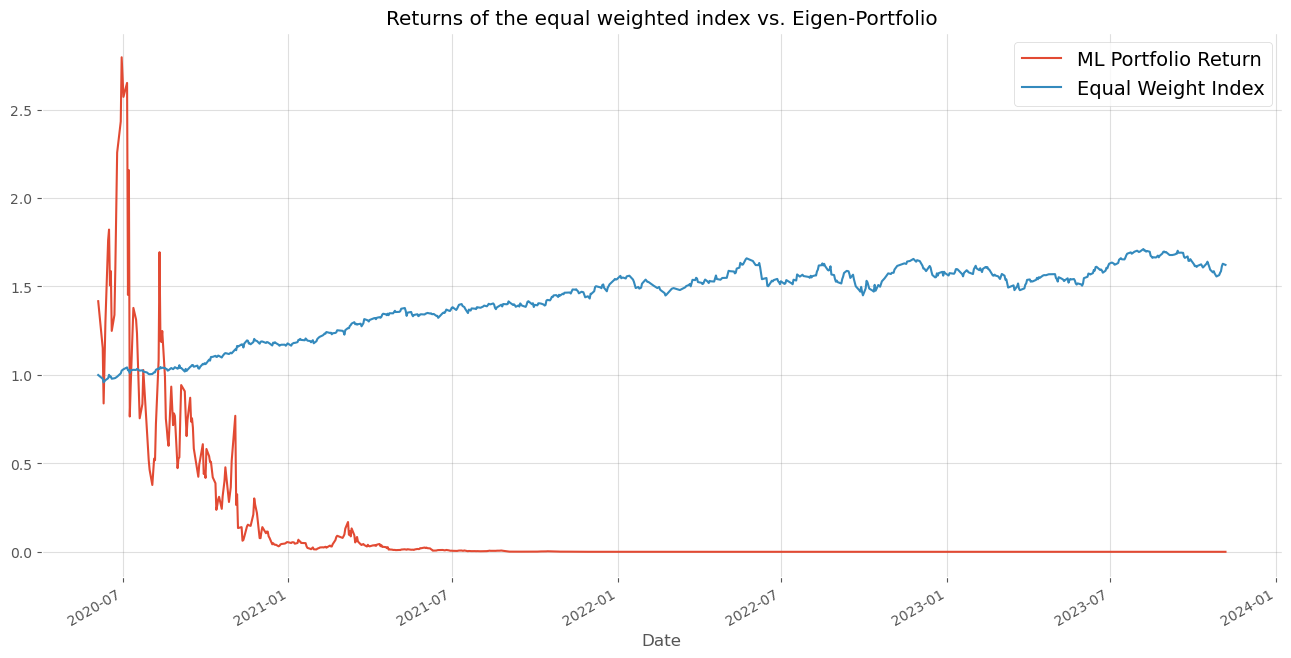

In [25]:
backtest_PCA_porfolios(eigen = weights[1]
                      )

Our PCA-based Portfolio:
Return = -75.53%
Volatility = 176.70%
Sharpe = -0.43


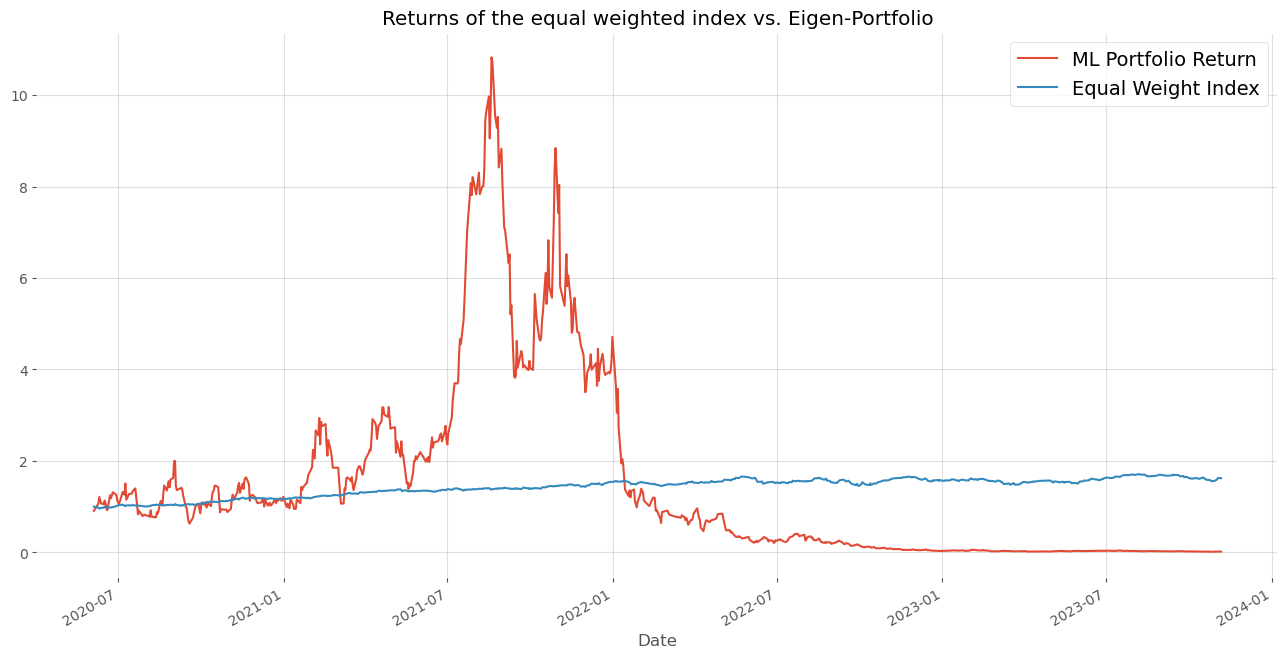

In [26]:
backtest_PCA_porfolios(eigen = weights[2])

Our PCA-based Portfolio:
Return = -55.23%
Volatility = 83.06%
Sharpe = -0.66


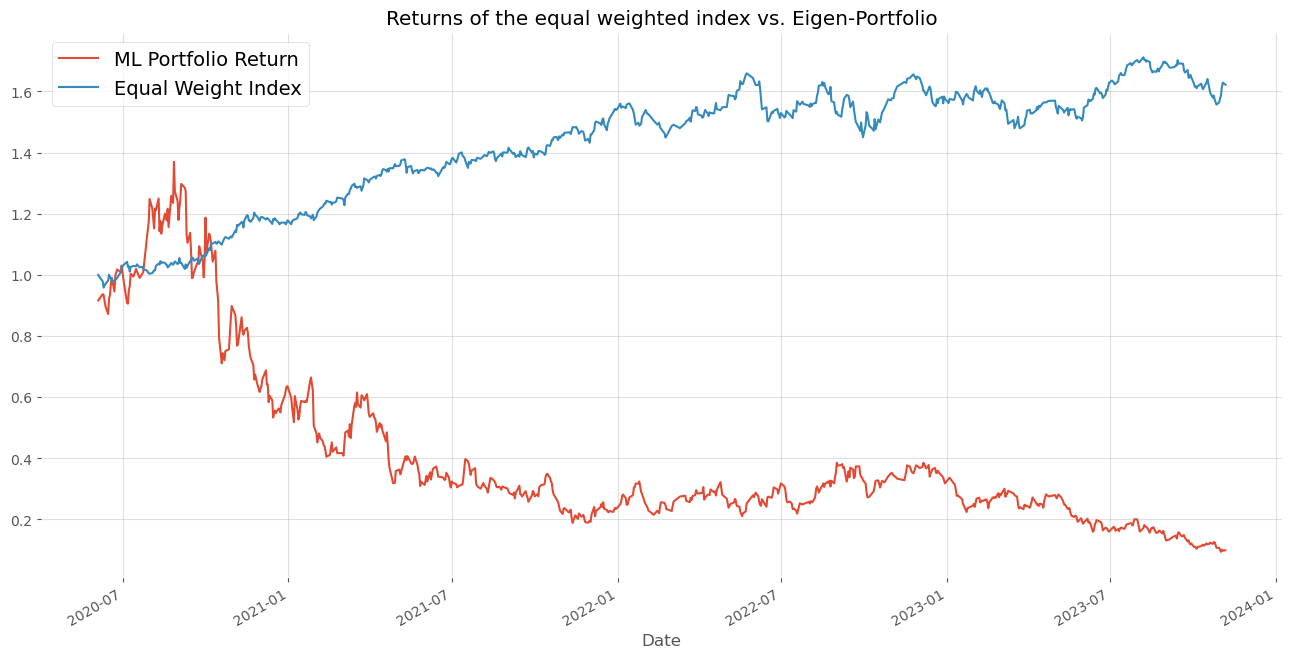

In [27]:
backtest_PCA_porfolios(eigen = weights[3])

## 👇 <font color = "purple"> Bigger Question 2. The next question is to look for clusters of correlations using the agglomerate hierarchical clustering technique (AGNES).

> The primary advantage AGNES has over other clustering methods is that you don’t need to guess how many clusters there might be.
    
> Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It’s then up to a quant to choose a cut-off threshold and decide how many clusters are present.

> Linkage does the actual clustering in one line of code, and returns a list of the clusters.

> There are different options for measuring the distance. We will choose the average distance measurement option, but others are possible (ward, single, centroid, etc.).

### The best way to visualize an agglomerate clustering algorithm is through a dendrogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. 
    
### The distance between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.
    
### <font color = green> Using Dow data, based on what you learned in class, run the above analysis and come up with a dendrogram. According to the dendrogram, which of the stocks are most correlated? Also based on the dendrogram, please identify two stocks that are not well correlated.

### Below are the lines of code that lead to an answer:

In [28]:
dow =\
(
    pd
    .read_csv("https://talktoroh.squarespace.com/s/dow_pca-hemx.csv",
              index_col = 0)
)

In [29]:
dow.shape[1]

30

In [30]:
missing_fractions = \
    dow \
    .isnull() \
    .mean() \
    .sort_values(ascending = False)

In [31]:
drop_list =\
    sorted(list(missing_fractions
                [missing_fractions > 0.3]
                .index)
           )

In [32]:
dow =\
    dow \
    .drop(labels= drop_list, 
          axis=1)

In [33]:
dow.shape[1] == 30-2

True

In [34]:
dow.isnull().values.any()

False

In [35]:
#Calculate average annual percentage return and volatilities over a theoretical one year period

returns =\
(
    dow
    .pct_change()
    .mean() 
    * 252
)

returns = pd.DataFrame(returns)

returns.columns = ["Returns"]

In [36]:
returns["Volatility"] =\
(    
     dow
    .pct_change()
    .std() 
    * np.sqrt(252)
)

data = returns

In [37]:
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler().fit(data)
rescaledDataset = pd.DataFrame(scaler.fit_transform(data),columns = returns.columns, index = returns.index)
X = rescaledDataset
X.head()

,Returns,Volatility
MMM,0.060722,-1.009566
AXP,-0.084588,1.115765
AAPL,3.153598,2.042296
BA,1.174373,0.182784
CAT,0.846008,0.552976


In [40]:
#before it is normalized data
from scipy.cluster.hierarchy import dendrogram, linkage, average

In [41]:
Z = linkage(X, 
            method = "average")
Z[0]

array([20.   , 25.   ,  0.044,  2.   ])

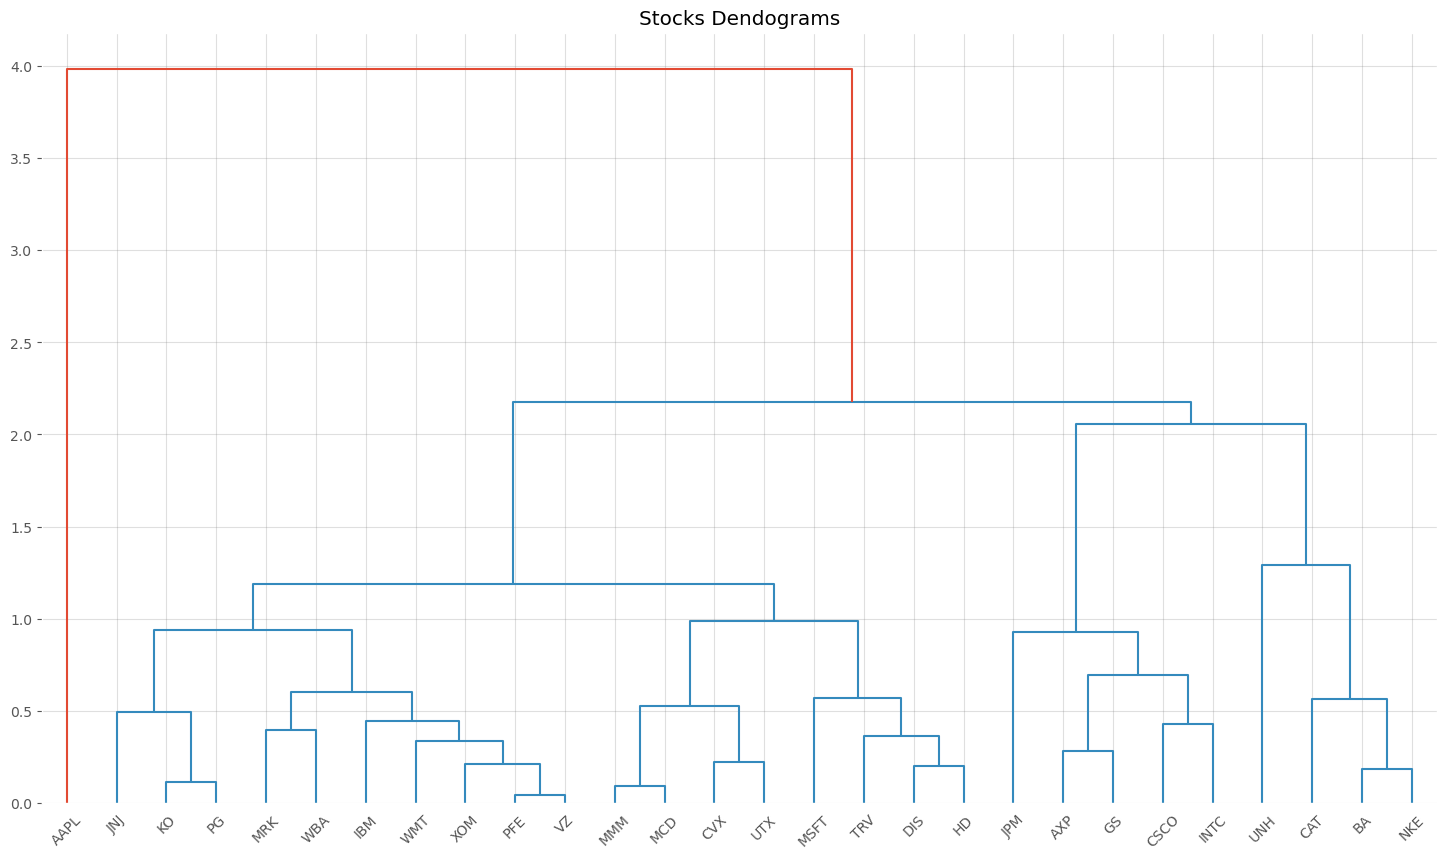

In [42]:
# Plot Dendogram

plt.figure(figsize=(18, 10)
          )
plt.title("Stocks Dendograms")

dendrogram(Z, labels = X.index)

plt.show()

**which of the stocks are most correlated?**

`PFE` and `VZ`

 **Also based on the dendrogram, please identify two stocks that are not well correlated.**

`AAPL` and `other stocks`

### <font color = red> Answer 2 is presented in the cell below: </font>

## <font color = blue> 👉 Questions 3 to 7 ask you to build, execute, and backtest a strategy, using both `MACD` and `RSI`. </font>

### <font color = green> Please combine the RSI and MACD strategies and own the stock if both RSI and MACD criteria provide a signal to buy. As to RSI, you will generalize the RSI threshold values to 50.

#### You are asked to build a trading strategy with the following set of rules.

### <font color = green> NOTE: Microsoft (`MSFT`) is our security of interest. The `investment horizon` will be three years between 2015 and 2017; your `capital` is USD 100,000; and there is a USD 5 flat `commission fee` per trade.

- You can go long and short.
<br>

- To calculate RSI, use 14 periods (trading days).
<br>

- Enter a long position under a condition where RSI is below 50 and, at the same time, bullish crossover based on MACD is accomplished.
<br>
    
- Enter a short position under a condition where RSI is above 50 and, at the same time, bearish crossover based on MACD is accomplished.

### <font color = green> NOTE: The MACD crossover strategy is defined as:    
    
- A `bullish` crossover arises when the MACD line turns `upward and crosses` beyond the MACD signal line.
- A `bearish` crossover arises when the MACD line turns `downward and crosses` under the MACD signal line.        
<br>

- The MACD is defined as the `difference` between the `12`-day ***exponential*** moving average and the `26`-day exponential moving average.
- The MACD signal line is then defined as the `9`-day ***exponential*** moving average of the MACD.
    
### <font color = green> NOTE: The RSI is defined as follows:
    
### Calculating the RSI first requires the RS which requires an average value of n-many previous trading days. 
<br>
    
- As discussed, a value of 14 days is common for the RSI calculation. 
<br>
    
- The first RS value requires the price from all 14 of the first trading days. Often, this is a source of confusion with the RSI given successive values only require the most recent. 
   
    
    Step 1. For 14 periods, calculate the difference in price from the current period 
    and the previous period
    
    Step 2. For each period, record each positive change in price as a gain and 
    each negative change as a loss
    
    Step 3. On the 14th period, calculate the arithmetic mean of the gains and losses for 
    the entire 14 day period (e.g. gains / 14 & losses / 14)
    
    Step 4. Use these values to calculate the RS
    
### <center> $ RS = \frac{AverageGain}{AverageLoss} $
    
    Step 5. Use the RS value to calculate the RSI
    
    Step 6. For each proceeding period, use only the previous RSI value 
    to calculate the nextaverage value by multiplying by our lookback 
    period – 1 (e.g., 13 for a lookback of 14).
    
    Step 7. Add the value obtained in Step 6 to the current day’s value 
    (run this for both the gains and losses)
    
### <center> $ RSI = 100 - \frac{100}{1 + RS} $

### Visualize your buy and sell positions.

### Below are the lines of code that lead to an answer:

In [43]:
#get data
yf.pdr_override()
MSFT = pdr.get_data_yahoo("MSFT", dt.datetime(2014,1,1), dt.datetime(2018,1,1))
MSFT

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,37.349998,37.400002,37.099998,37.160000,31.354321,30632200
2014-01-03,37.200001,37.220001,36.599998,36.910000,31.143391,31134800
2014-01-06,36.849998,36.889999,36.110001,36.130001,30.485258,43603700
2014-01-07,36.330002,36.490002,36.209999,36.410000,30.721502,35802800
2014-01-08,36.000000,36.139999,35.580002,35.759998,30.173058,59971700
...,...,...,...,...,...,...
2017-12-22,85.400002,85.629997,84.919998,85.510002,79.980309,14145800
2017-12-26,85.309998,85.529999,85.029999,85.400002,79.877426,9891200
2017-12-27,85.650002,85.980003,85.220001,85.709999,80.167358,14678000


In [44]:
#process data
MSFT = MSFT[["Adj Close"]].copy()
MSFT.columns = ["Close"]

#short and long EWM
short_EWM = 12
long_EWM = 26

MSFT["short_EWM"] = MSFT["Close"].ewm(span=short_EWM).mean()
MSFT["long_EWM"] = MSFT["Close"].ewm(span=long_EWM).mean()

#MACD and MACD signal line
signal = 9

MSFT["MACD"] = MSFT["short_EWM"] - MSFT["long_EWM"]
MSFT["MACD_signal"] = MSFT["MACD"].ewm(span = signal).mean()
MSFT.head()

,Close,short_EWM,long_EWM,MACD,MACD_signal
Date,,,,,
2014-01-02,31.354321,31.354321,31.354321,0.000000,0.000000
2014-01-03,31.143391,31.240067,31.244799,-0.004732,-0.002629
2014-01-06,30.485258,30.945465,30.971903,-0.026439,-0.012387
2014-01-07,30.721502,30.874769,30.901902,-0.027134,-0.017383
2014-01-08,30.173058,30.684116,30.732880,-0.048764,-0.026718


In [45]:
#A bullish crossover arises when the MACD line turns upward and crosses beyond the MACD signal line
#A bearish crossover arises when the MACD line turns downward and crosses under the MACD signal line
MSFT1 = MSFT.copy()

#setting buy and sell
#when signal comes up we buy and sell lagged 1 day
#don't need, lag final position
MSFT1["position_MACD"] = np.where(MSFT1["MACD"] > MSFT1["MACD_signal"], 1, -1)
#MSFT1["position_MACD"] = MSFT1["position_MACD"].shift(1)

In [46]:
#calculate RSI
period = 14

MSFT2 = MSFT1.copy()
MSFT2["change"] = MSFT2["Close"].diff()

MSFT2["gain"] = MSFT2["change"].apply(lambda x: x if x > 0 else 0)
MSFT2["loss"] = MSFT2["change"].apply(lambda x: -x if x < 0 else 0)

MSFT2["avg_gain"] = MSFT2["gain"].rolling(period).mean()
MSFT2["avg_loss"] = MSFT2["loss"].rolling(period).mean()
for i in range(14,len(MSFT2)):
    MSFT2.iloc[i, MSFT2.columns.get_loc("avg_gain")] = (MSFT2.iloc[i-1]["avg_gain"]*13+MSFT2.iloc[i]["gain"])/14
    MSFT2.iloc[i, MSFT2.columns.get_loc("avg_loss")] = (MSFT2.iloc[i-1]["avg_loss"]*13+MSFT2.iloc[i]["loss"])/14
    
MSFT2["RS"] = MSFT2["avg_gain"]/MSFT2["avg_loss"]
MSFT2["RSI"] = 100 - 100/(1+MSFT2["RS"])

#we need to shift RSI 1 cuz it can only be used in next day
#actually dont need, we could just shift position instead
MSFT2["RSI"] = MSFT2["RSI"]
#get 2015 to 2017 data
MSFT2 = MSFT2["2015-01-01":]

In [47]:
MSFT2

,Close,short_EWM,long_EWM,MACD,MACD_signal,position_MACD,change,gain,loss,avg_gain,avg_loss,RS,RSI
Date,,,,,,,,,,,,,
2015-01-02,40.534843,40.952206,41.049505,-0.097299,-0.026064,-1,0.268745,0.268745,0.000000,0.186868,0.226345,0.825586,45.223080
2015-01-05,40.162083,40.830648,40.983770,-0.153121,-0.051476,-1,-0.372761,0.000000,0.372761,0.173520,0.236804,0.732759,42.288569
2015-01-06,39.572617,40.637105,40.879240,-0.242135,-0.089608,-1,-0.589466,0.000000,0.589466,0.161126,0.261994,0.614998,38.080425
2015-01-07,40.075390,40.550687,40.819696,-0.269008,-0.125488,-1,0.502773,0.502773,0.000000,0.185529,0.243280,0.762616,43.266133
2015-01-08,41.254353,40.658943,40.851892,-0.192949,-0.138980,-1,1.178963,1.178963,0.000000,0.256489,0.225903,1.135394,53.170226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,79.980309,79.671936,78.769543,0.902393,0.905002,-1,0.009354,0.009354,0.000000,0.357651,0.259277,1.379417,57.972890
2017-12-26,79.877426,79.703550,78.851608,0.851942,0.894390,-1,-0.102882,0.000000,0.102882,0.332105,0.248106,1.338559,57.238627
2017-12-27,80.167358,79.774905,78.949071,0.825834,0.880679,-1,0.289932,0.289932,0.000000,0.329093,0.230384,1.428450,58.821470


In [48]:
MSFT3 = MSFT2[["Close", "MACD", "MACD_signal", "position_MACD", "RSI"]].copy()

MSFT3["position_RSI"] = np.where(MSFT3["RSI"]<50, 1, -1)

MSFT3["position"] = np.where((MSFT3["position_MACD"]==-1)&(MSFT3["position_RSI"]==-1), -1, np.nan)
MSFT3["position"] = np.where((MSFT3["position_MACD"]==1)&(MSFT3["position_RSI"]==1), 1, MSFT3["position"])
MSFT3["position"] = MSFT3["position"].shift(1)
MSFT3["position"].ffill(inplace=True)
MSFT3["position"].fillna(0, inplace=True)

In [49]:
#set long_or_short signal
MSFT3["long_or_short"] = MSFT3["position"].diff()
MSFT3["long_or_short"].fillna(0, inplace=True)
MSFT3["long_or_short"] = np.where(MSFT3["long_or_short"]==2, 1, MSFT3["long_or_short"])
MSFT3["long_or_short"] = np.where(MSFT3["long_or_short"]==-2, -1, MSFT3["long_or_short"])

In [50]:
def visualize_long_short(stock):
    plt.figure(figsize=[19,8])
    plt.plot(stock["Close"], "b")
    plt.plot(stock.Close[stock.long_or_short == 1].index, stock.Close[stock.long_or_short == 1], "g^", markersize = 12)
    plt.plot(stock.Close[stock.long_or_short == -1].index, stock.Close[stock.long_or_short == -1], "rv", markersize = 12)
    plt.show()

### <font color = red> Answer 3 is presented in the cell below: </font>

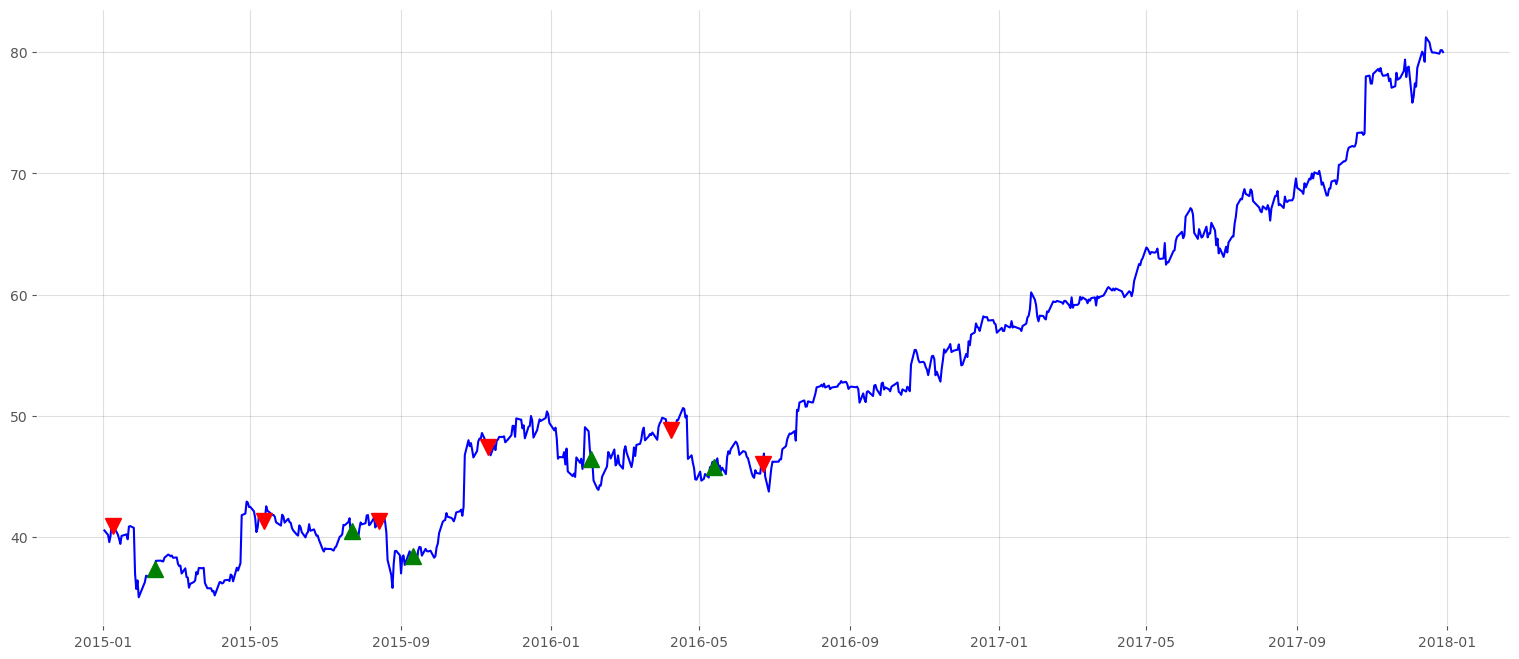

In [51]:
visualize_long_short(MSFT3)

### <font color = blue> 👉 Question 4</font>. How much in cumulative returns could you have had as a result of the RSI strategy?

### Below are the lines of code that lead to an answer:

In [52]:
#first count commision fee
MSFT3["fee"] = 0
MSFT3.fee[MSFT3.long_or_short != 0] = 5

#then we get str_return
MSFT3["str_return"] = np.log(MSFT3["Close"]/MSFT3["Close"].shift(1))*MSFT3["position"]
MSFT3["str_return"].fillna(0, inplace=True)

#next we put into money
#originate first
MSFT3["money_left"] = 1e5
#calculate
for i in range(len(MSFT3)):
    MSFT3["money_left"][i] = (
        (MSFT3["money_left"][i-1] 
         - 
         MSFT3["fee"][i]
        )
        *
        np.exp(MSFT3["str_return"][i]))
    
MSFT3

,Close,MACD,MACD_signal,position_MACD,RSI,position_RSI,position,long_or_short,fee,str_return,money_left
Date,,,,,,,,,,,
2015-01-02,40.534843,-0.097299,-0.026064,-1,45.223080,1,0.0,0.0,0,0.000000,100000.000000
2015-01-05,40.162083,-0.153121,-0.051476,-1,42.288569,1,0.0,0.0,0,-0.000000,100000.000000
2015-01-06,39.572617,-0.242135,-0.089608,-1,38.080425,1,0.0,0.0,0,-0.000000,100000.000000
2015-01-07,40.075390,-0.269008,-0.125488,-1,43.266133,1,0.0,0.0,0,0.000000,100000.000000
2015-01-08,41.254353,-0.192949,-0.138980,-1,53.170226,-1,0.0,0.0,0,0.000000,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,79.980309,0.902393,0.905002,-1,57.972890,-1,-1.0,0.0,0,-0.000117,112752.504208
2017-12-26,79.877426,0.851942,0.894390,-1,57.238627,-1,-1.0,0.0,0,0.001287,112897.729801
2017-12-27,80.167358,0.825834,0.880679,-1,58.821470,-1,-1.0,0.0,0,-0.003623,112489.425304


In [53]:
MSFT3["money_left"][-1]/MSFT3["money_left"][0] - 1

0.12712969865203605

### <font color = red> Answer 4 </font>

    The answer is ____42.26________ % .

### <font color = blue> 👉 Question 5</font>. Now please find the `five` worst drawdown periods over the investment horizon and provide their net drawdown in % and duration, respectively.

### <font color = green> The question asks you to find the five worst drawdown periods, beyond identifying max drawdown (MDD).

In [54]:
MSFT4 = MSFT3.copy()
MSFT4["str_log_return"] = np.log(MSFT4["money_left"]/MSFT4["money_left"].shift(1))
MSFT4["cumulative_return"] = np.exp(MSFT4["str_log_return"].cumsum())
MSFT4["max_performance_return"] = MSFT4["cumulative_return"].cummax()
MSFT4.tail()

,Close,MACD,MACD_signal,position_MACD,RSI,position_RSI,position,long_or_short,fee,str_return,money_left,str_log_return,cumulative_return,max_performance_return
Date,,,,,,,,,,,,,,
2017-12-22,79.980309,0.902393,0.905002,-1,57.972890,-1,-1.0,0.0,0,-0.000117,112752.504208,-0.000117,1.127525,2.061777
2017-12-26,79.877426,0.851942,0.894390,-1,57.238627,-1,-1.0,0.0,0,0.001287,112897.729801,0.001287,1.128977,2.061777
2017-12-27,80.167358,0.825834,0.880679,-1,58.821470,-1,-1.0,0.0,0,-0.003623,112489.425304,-0.003623,1.124894,2.061777
2017-12-28,80.176712,0.796714,0.863886,-1,58.874360,-1,-1.0,0.0,0,-0.000117,112476.301975,-0.000117,1.124763,2.061777
2017-12-29,80.008362,0.751390,0.841387,-1,57.444276,-1,-1.0,0.0,0,0.002102,112712.969865,0.002102,1.127130,2.061777


In [55]:
#calculate drawdown
MSFT4["drawdown"] = (
    -(
        MSFT4["cumulative_return"]
        -
        MSFT4["max_performance_return"]
    )
    /
    MSFT4["max_performance_return"])

In [56]:
def worst_5th_drawdown(stock):
    stock_drawdown = (
        pd.concat(
            [
                stock[stock.drawdown==0],# we need to get drawdown == 0
                stock[-1:] #plus last one
            ],
            axis=0
        )
    )

    lst_day = []
    lst_drawdown = []

    for i in range(len(stock_drawdown) - 1):
        days = (stock_drawdown.index[i+1] - stock_drawdown.index[i]).days
        max_drawdown = stock[stock_drawdown.index[i]:stock_drawdown.index[i+1]]["drawdown"].max()
        lst_day.append(days)
        lst_drawdown.append(max_drawdown)

    drawdown = pd.DataFrame([lst_day,lst_drawdown]).T
    drawdown.columns = ["days", "drawdown"]
    return drawdown.loc[drawdown["drawdown"].nlargest(5).index]

### Below are the lines of code that lead to an answer:

In [57]:
worst_5th_drawdown(MSFT4)

,days,drawdown
48,550.0,0.461567
39,71.0,0.114423
12,60.0,0.087429
35,68.0,0.084250
23,41.0,0.078762


### <font color = red> Answer 5 </font>

    The Worst drawdown period     : Net drawdown ____35.96________ % | Duration ____476________ Days
    
    The 2nd worst drawdown period : Net drawdown ____8.74________ % | Duration _____60_______ Days
     
    The 3rd worst drawdown period : Net drawdown ____8.62________ % | Duration ____50________ Days
         
    The 4th worst drawdown period : Net drawdown _____8.43_______ % | Duration _____68_______ Days
    
    The 5th worst drawdown period : Net drawdown _____8.37_______ % | Duration ______54______ Days

### <font color = blue> 👉 Question 6</font>. Within the investment horizon, please calculate annual returns for each of the three years and then find the year that performs better than average vs. less than average annual returns.

### Below are the lines of code that lead to an answer:

In [58]:
def period_return(stock, start, end):
    stock = stock.loc[start:end]
    return (stock["money_left"].iloc[-1] - stock["money_left"].iloc[0])/stock["money_left"].iloc[0]

In [59]:
lst_returns = (
    [period_return(MSFT4,dt.datetime(2015,1,1),dt.datetime(2016,1,1)), 
     period_return(MSFT4,dt.datetime(2016,1,1),dt.datetime(2017,1,1)), 
     period_return(MSFT4,dt.datetime(2017,1,1),dt.datetime(2018,1,1)), 
    ]
)

In [60]:
np.mean(lst_returns)

0.11270822630324391

In [61]:
lst_returns

[0.7019272674526591, -0.07941163285515904, -0.2843909556877683]

### <font color = red> Answer 6 </font>

    Below average year(s) : ____2016,2017________ 
    
    Above average year(s) : ____2015________ 
     

###  <font color = blue> 👉 Question 7. </font> What's the annualized Sharpe ratio of the current investment strategy?

### Below are the lines of code that lead to an answer:

In [62]:
MSFT4["str_log_return"].fillna(0, inplace=True)

(
    253**0.5
    *
    np.mean(MSFT4["str_log_return"].apply(np.exp)-1)
    /
    np.std(MSFT4["str_log_return"].apply(np.exp)-1)
)

0.28862334202304746

### <font color = red> Answer 7 </font>
    
    Sharpe ratio: ___0.63_______
    

###  <font color = blue> 👉 Question 8. </font> Please compare the above Sharpe ratio deploying RSI-MACD combined strategy, relative to the Sharpe ratio utilizing MACD strategy only. Which investment strategy performs better based on the Sharpe ratio?

### Below are the lines of code that lead to an answer:

In [63]:
MSFT5 = MSFT4[["Close", "MACD", "MACD_signal", "position_MACD"]].copy()
MSFT5.rename(columns={"position_MACD":"position"},inplace=True)

MSFT5["position"] = MSFT5["position"].shift(1)
MSFT5["long_or_short"] = MSFT5["position"].diff()
MSFT5["long_or_short"] = MSFT5["long_or_short"].fillna(0)
MSFT5["long_or_short"] = np.where(MSFT5["long_or_short"]==2, 1, MSFT5["long_or_short"])
MSFT5["long_or_short"] = np.where(MSFT5["long_or_short"]==-2, -1, MSFT5["long_or_short"])

In [64]:
def cumulative_return(stock):
    #first count commision fee
    stock["fee"] = 0
    stock.fee[stock.long_or_short != 0] = 5

    #then we get str_return
    stock["str_return"] = np.log(stock["Close"]/stock["Close"].shift(1))*stock["position"]
    stock["str_return"].fillna(0, inplace=True)

    #next we put into money
    #originate first
    stock["money_left"] = 1e5
    #calculate
    for i in range(len(MSFT3)):
        stock["money_left"][i] = (
            (stock["money_left"][i-1] 
             - 
             stock["fee"][i]
            )
            *
            np.exp(stock["str_return"][i]))

    return stock

In [65]:
MSFT5 = cumulative_return(MSFT5)
MSFT5["str_log_return"] = np.log(MSFT5["money_left"]/MSFT5["money_left"].shift(1))

In [66]:
MSFT5["str_log_return"].fillna(0, inplace=True)

(
    253**0.5
    *
    np.mean(MSFT5["str_log_return"].apply(np.exp)-1)
    /
    np.std(MSFT5["str_log_return"].apply(np.exp)-1)
)

-0.3610186095246974

### <font color = red> Answer 8 </font>
    
    _____RSI-MACD combined_____________________ strategy performs better.
    

> 💯 “Thank you for putting your efforts into the individual assessment questions” 😊